In [412]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn import metrics
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [450]:
df=pd.read_csv("Dataset.csv")

In [451]:
df=df.dropna()

In [452]:
# Encoding of categorical variables
df = pd.get_dummies(df, columns=['Col2','Col3','Col7','Col9','Col11','Col12','Col13'], drop_first=True)

In [453]:
df.head()

,Col1,Col4,Col5,Col6,Col8,Col10,Target,Col2_1,Col3_nang,Col3_nont,...,Col7_1,Col7_2,Col9_1,Col11_2,Col11_3,Col12_1,Col12_2,Col12_3,Col13_n,Col13_r
0,63,145,233,1,150,2.3,A,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,67,160,286,0,108,1.5,B,1,0,0,...,0,1,1,1,0,0,0,1,1,0
2,67,120,229,0,129,2.6,B,1,0,0,...,0,1,1,1,0,0,1,0,0,1
3,37,130,250,0,187,3.5,A,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,41,130,204,0,172,1.4,A,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [454]:
df.columns

Index(['Col1', 'Col4', 'Col5', 'Col6', 'Col8', 'Col10', 'Target', 'Col2_1',
       'Col3_nang', 'Col3_nont', 'Col3_t', 'Col7_1', 'Col7_2', 'Col9_1',
       'Col11_2', 'Col11_3', 'Col12_1', 'Col12_2', 'Col12_3', 'Col13_n',
       'Col13_r'],
      dtype='object')

In [455]:
df['Target']=df['Target'].replace(['A','B'],[1,0])

In [437]:
df.columns

Index(['Col1', 'Col4', 'Col5', 'Col6', 'Col8', 'Col10', 'Target', 'Col2_1',
       'Col3_nang', 'Col3_nont', 'Col3_t', 'Col7_1', 'Col7_2', 'Col9_1',
       'Col11_2', 'Col11_3', 'Col12_1', 'Col12_2', 'Col12_3', 'Col13_n',
       'Col13_r'],
      dtype='object')

In [438]:
# calculate spearman's correlation
for i in df.columns:
    corr, _ = spearmanr(df['Target'], df[i])
    print('spearmanr correlation of '+ i + ' with Target: %.3f' % corr)

spearmanr correlation of Col1 with Target: -0.240
spearmanr correlation of Col4 with Target: -0.132
spearmanr correlation of Col5 with Target: -0.116
spearmanr correlation of Col6 with Target: -0.003
spearmanr correlation of Col8 with Target: 0.429
spearmanr correlation of Col10 with Target: -0.411
spearmanr correlation of Target with Target: 1.000
spearmanr correlation of Col2_1 with Target: -0.278
spearmanr correlation of Col3_nang with Target: 0.305
spearmanr correlation of Col3_nont with Target: 0.248
spearmanr correlation of Col3_t with Target: 0.091
spearmanr correlation of Col7_1 with Target: -0.068
spearmanr correlation of Col7_2 with Target: -0.157
spearmanr correlation of Col9_1 with Target: -0.421
spearmanr correlation of Col11_2 with Target: -0.350
spearmanr correlation of Col11_3 with Target: -0.061
spearmanr correlation of Col12_1 with Target: -0.229
spearmanr correlation of Col12_2 with Target: -0.272
spearmanr correlation of Col12_3 with Target: -0.210
spearmanr correla

In [439]:
#In the attached dataset there are 13 independent features: Col1 to Col13.
#Features Col2, Col3, Col6, Col7, Col9, Col11, Col12 and Col13 are categorical in nature.
#Remaining features are continuous in nature.

#You can assume that there features are masked.

#It's a classification problem.

#Solve below questions in a jupyter notebook and share the solutions with me by 5pm on 22nd May, 2020.
#1.	Get the relationship (for eg correlation) between each independent feature with the Target variable and plot corresponding graphs wherever required.
#2.	Use all the rows as training dataset and fit three different types of classifiers on this data. Do the hyperparameter tuning wherever required to get the best possible version of that classifier for this dataset.
#3.	Compare all three classifiers based on accuracy. Also plot ROC curves for all three classifiers in same graph to compare them.


In [440]:
df.shape

(297, 21)

# OUTLIERS REMOVAL

In [456]:
z = np.abs(stats.zscore(df))
threshold = 3
#print(np.where(z > 3))
#print(z)
df = df[(z < 3).all(axis=1)]

In [457]:
df.shape

(230, 21)

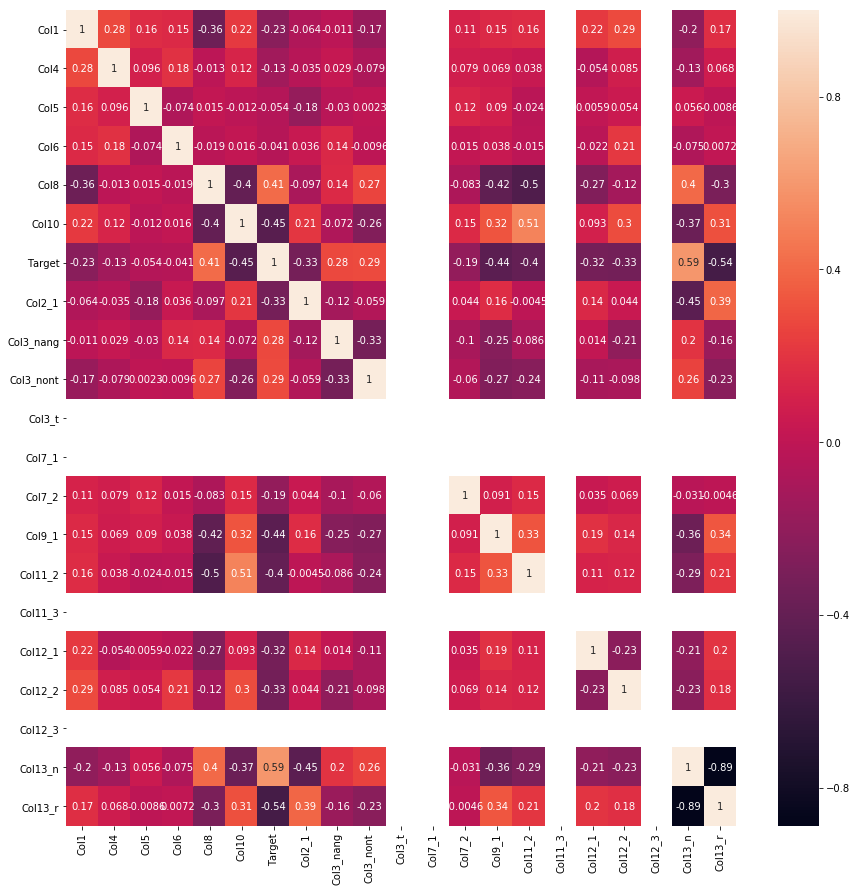

In [443]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

In [458]:
Y=df['Target']

In [459]:
X_1= df.loc[:, df.columns != 'Target']

In [460]:
X_1.shape

(230, 20)

In [461]:
X =df.loc[:, X_1.columns != 'Col8']

In [462]:
X.shape

(230, 19)

In [463]:
X.columns

Index(['Col1', 'Col4', 'Col5', 'Col6', 'Col10', 'Target', 'Col2_1',
       'Col3_nang', 'Col3_nont', 'Col3_t', 'Col7_1', 'Col7_2', 'Col9_1',
       'Col11_2', 'Col11_3', 'Col12_1', 'Col12_2', 'Col12_3', 'Col13_n'],
      dtype='object')

AttributeError: 'AxesSubplot' object has no attribute 'plt'

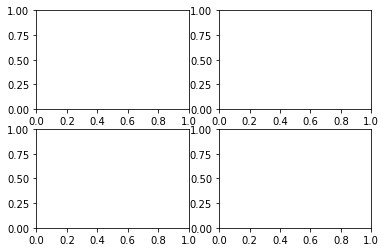

In [524]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

ax[0, 0].plt.scatter(df['Col1'], df['Target'])#row=0, col=0
ax[1, 0].plt.scatter(df['Col2'], df['Target']) #row=1, col=0
ax[0, 1].plt.scatter(df['Col3'], df['Target']) #row=0, col=1
ax[1, 1].plt.scatter(df['Col4'], df['Target']) #row=1, col=1
plt.show()

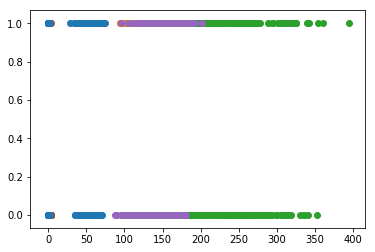

In [368]:
## Subplots
for i in df.columns:
    plt.scatter(df[i], df['Target'])

In [504]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20)

In [505]:
#1.	Get the relationship (for eg correlation) between each independent feature with the Target variable and plot corresponding graphs wherever required.
#2.	Use all the rows as training dataset and fit three different types of classifiers on this data. Do the hyperparameter tuning wherever required to get the best possible version of that classifier for this dataset.
#3.	Compare all three classifiers based on accuracy. Also plot ROC curves for all three classifiers in same graph to compare them.


In [506]:
X_train.shape

(184, 19)

In [507]:
X_test.shape

(46, 19)

# Modelling using LogisticRegression

In [508]:
lr = LogisticRegression()

In [374]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

In [375]:
param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

In [376]:
grid_search_lr = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    verbose=1,
                    n_jobs=-1)

In [328]:
# Fit the grid search to the data
grid_search_lr.fit(X_train, Y_train)
best_grid = grid_search_lr.best_estimator_

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   28.2s finished


In [329]:
best_grid 

LogisticRegression(C=10, class_weight={1: 0.6, 0: 0.4}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [509]:
lr = LogisticRegression()

In [510]:
model_lr=lr.fit(X_train,Y_train)

In [511]:
y_pred_lr = model_lr.predict(X_test)

In [512]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [513]:
### with class_weight="balanced"
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred_lr))
print(classification_report(Y_test,y_pred_lr))

[[21  0]
 [ 0 25]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00        46



# Modelling using Random Forest

In [474]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [475]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [476]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

In [271]:
best_grid = grid_search.best_estimator_

In [272]:
X.shape

(230, 20)

In [273]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [514]:
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [515]:
model_rf=rfc.fit(X_train,Y_train)

In [516]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [517]:
y_pred_rf = model_rf.predict(X_test)

In [518]:
### with class_weight="balanced"
print('Accuracy of Random Forest on test set: {:.2f}'.format(rfc.score(X_test,Y_test)))

Accuracy of Random Forest on test set: 1.00


In [482]:
### with class_weight="balanced"
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test,y_pred_rf))

[[19  0]
 [ 1 38]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97        19
          1       1.00      0.97      0.99        39

avg / total       0.98      0.98      0.98        58



# Modelling using XGBoost

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred_xgb = model.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Modelling with SVM

In [483]:
clf = SVC(kernel='linear',probability=True)

In [484]:
# fitting x samples and y classes 
model_svm=clf.fit(X_train,Y_train) 

In [485]:
y_pred_svm=model_svm.predict(X_test)

In [486]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_svm))

Accuracy: 1.0


In [487]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Y_test, y_pred_svm))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y_test, y_pred_svm))

Precision: 1.0
Recall: 1.0


# ROC curve for all classifiers

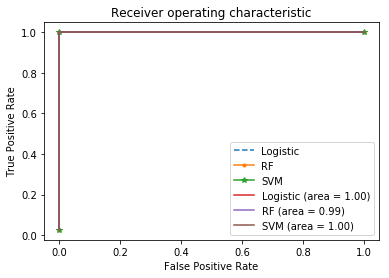

In [488]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Logit
rf_roc_auc_lr = roc_auc_score(Y_test,y_pred_lr)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1])

## Random Forest
rf_roc_auc_rf = roc_auc_score(Y_test,y_pred_rf)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, model_rf.predict_proba(X_test)[:,1])

## SVM
rf_roc_auc_svm = roc_auc_score(Y_test,y_pred_svm)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_test, model_svm.predict_proba(X_test)[:,1])

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF')
plt.plot(svm_fpr, svm_tpr, marker='*', label='SVM')

#AUC
plt.plot(lr_fpr, lr_tpr, label='Logistic (area = %0.2f)' % rf_roc_auc_lr)
plt.plot(rf_fpr, rf_tpr, label='RF (area = %0.2f)' % rf_roc_auc_rf)
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % rf_roc_auc_svm)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.title('Receiver operating characteristic')
plt.show()